<a href="https://colab.research.google.com/github/Chuckboliver/Probability-and-Statistics/blob/main/HW4/Probstat_HW4_ID62010615.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Probability and Statistics**
---
***62010615 พัฒน์ภูมิ หาแก้ว***
## **Homework 4 : Confidence Interval (CI) of Mean**
* หา **Confidence Interval (CI) of Mean** ของข้อมูล 1 คอลัมน์ที่เป็นตัวเลข
* ด้วยค่า **Confidence Level = 90%, 95%, 99%**

## **Data set**
- Pokemon for datamining and machine learning 

> **source :** https://www.kaggle.com/alopez247/pokemon

# **Module ที่ใช้**
---

*   Pandas
*   Scikit learn
*   Matplotlib
*   Numpy
*   Scipy

In [689]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import numpy as np
from sklearn.utils import resample
drive.mount("/content/drive")
%matplotlib inline
plt.style.use("seaborn-darkgrid")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data set**
---
* ข้อมูลขนาด 721 แถว

## **Columns ที่สนใจ :**
1. **Name** (ชื่อของ Pokemon)
2. **Height_m** (ส่วนสูงของ Pokemon ในหน่วยเมตร)
3. **Weight_kg** (น้ำหนักของ Pokemon ในหน่วยกิโลกรัม)
4. **Type_1** (ชนิดของ Pokemon)
5. **Body_Style** (รูปร่างร่างกายของ Pokemon)

In [690]:
df = pd.read_csv("/content/drive/MyDrive/Data sets/pokemon_alopez247.csv")
df = df[["Name", "Height_m", "Weight_kg", "Type_1",  "Body_Style"]]
df

,Name,Height_m,Weight_kg,Type_1,Body_Style
0,Bulbasaur,0.71,6.9,Grass,quadruped
1,Ivysaur,0.99,13.0,Grass,quadruped
2,Venusaur,2.01,100.0,Grass,quadruped
3,Charmander,0.61,8.5,Fire,bipedal_tailed
4,Charmeleon,1.09,19.0,Fire,bipedal_tailed
...,...,...,...,...,...
716,Yveltal,5.79,203.0,Dark,two_wings
717,Zygarde,5.00,305.0,Dragon,serpentine_body
718,Diancie,0.71,8.8,Rock,head_arms
719,Hoopa,0.51,9.0,Psychic,head_only


# **Population mean**
---
* ค่าเฉลี่ยประชากรของ Pokemon ทั้งหมด 721 ตัว

In [691]:
s = df[["Height_m"]].mean(skipna=True, axis="index")
pop_mean = float(s)
pd.DataFrame(s, columns=["Population Mean"]).T

,Height_m
Population Mean,1.144979


# **Bootstrap**
---


## ***Bootstrap's configuration***

* ตั้งค่าการ bootstrap เพื่อหา **Confidence interval**
> * ทำการ resampling 20000 ครั้ง (repetition = 20000)
  * ทำการสุ่ม sample 100% จากขนาดของ Data set (sample size = 721)
  * คำนวณหา confidence interval {90%, 95%, 99%}


In [692]:
#Configure bootstrap
n_iteration = 20000
sample_ratio = 1
n_size = int(len(df) * sample_ratio)
CIs = [0.9, 0.95, 0.99]

## ***ทำการ Bootstrap***
* ทำการสุ่ม bootstrap sample มา 20000 samples
* ในแต่ละรอบการทำงานทำการสุ่มข้อมูลมาเป็น sample 
หลังจากนั้นใส่ข้อมูลนั้นกลับเข้าไป ทำจนครบ sample sizes 
(Random sampling with replacement)

* เมื่อได้ bootstrap sample มาทำการคำนวณ sample mean แล้วเก็บไว้ 

In [693]:
values = df["Height_m"].values
means = list()
for _ in range(n_iteration):
    sample = resample(values, n_samples=n_size, replace=True)
    x_bar = np.mean(sample)
    means.append(x_bar)

## ***Histogram ของ Sample means***

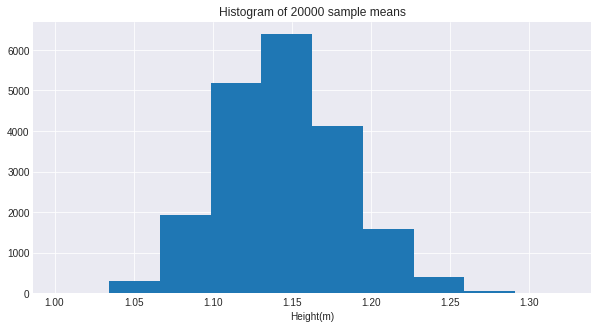

In [706]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 5))
ax.hist(means)
ax.set(title=f"Histogram of {n_iteration} sample means", xlabel="Height(m)")
plt.show()

## ***คำนวณหา Confidence interval of Mean***

In [695]:
def confidence_interval(alpha: float):
    global means
    p = ((1.0-alpha)/2.0) * 100
    lower =  np.percentile(means, p) 
    p = (alpha+((1.0-alpha)/2.0)) * 100
    upper =  np.percentile(means, p) 
    return (lower, upper)

Intervals = dict()
for alpha in CIs:
    lower, upper = confidence_interval(alpha)
    Intervals[f"{alpha}"] = (lower, upper)
    print(f"\n{alpha*100}% Confidence level --> interval ({lower:.3f}, {upper:.3f})")


90.0% Confidence level --> interval (1.083, 1.212)

95.0% Confidence level --> interval (1.073, 1.226)

99.0% Confidence level --> interval (1.052, 1.254)


# **Density plot**
---

## ***Probability Distribution Function ของความสูง Pokemon***
* เส้นประคือ Population mean = 1.145

In [696]:
def fill_color(mask, x, y, axes, color="blue", alpha=0.5, verbose=False):
    x_mask, y_mask = x[mask], y(x)[mask]
    if verbose:
        print(x_mask[0], x_mask[-1], y_mask[0], y_mask[-1])
    return axes.fill_between(x_mask, y1=y_mask, alpha=alpha, facecolor=color)

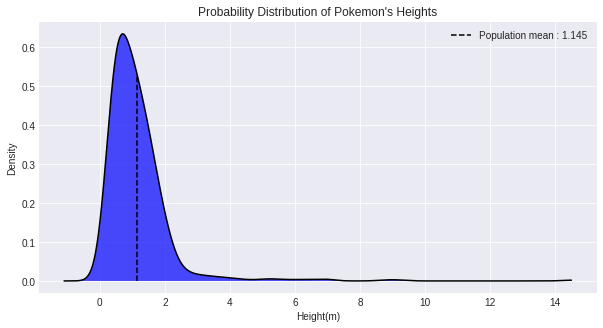

In [697]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 5))
y = scipy.stats.gaussian_kde(df["Height_m"])
x = np.linspace(df["Height_m"].min()-1.2, df["Height_m"].max() , 3000)
ax.plot(x, y(x), color="black")
ax.set(title="Probability Distribution of Pokemon's Heights", xlabel="Height(m)", ylabel="Density")
bg_mask = bg_mask = (x.min() <= x) &  (x <= x.max())
fill_color(bg_mask, x, y, ax, "blue", 0.7)
mean_line_collections = ax.vlines(pop_mean, ymin=0, ymax=y(pop_mean), color="black", linestyles="dashed")
mean_line_collections.set(label=f"Population mean : {pop_mean:.3f}")
ax.legend(handles=[mean_line_collections])
plt.show()

## ***Confidence interval of Mean เมื่อนำมาระบายสีเป็นช่วง (Zoom จากภาพด้านบน)***

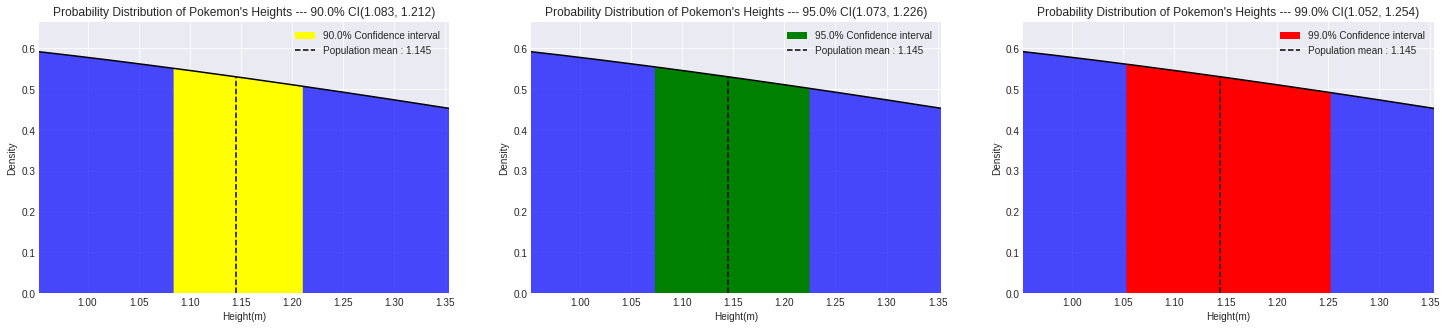

In [698]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(25, 5))
y = scipy.stats.gaussian_kde(df["Height_m"])
x = np.linspace(df["Height_m"].min()-1.2, df["Height_m"].max() , 10000)
colors = ("yellow", "green", "red")
xmin = min([x[0] for x in Intervals.values()]) - 0.1
xmax = max([x[1] for x in Intervals.values()]) + 0.1
Intervals_keys = [float(k) for k in Intervals.keys()]
Intervals_values = [v for v in Intervals.values()]
for i in range(3):  
    ax[i].plot(x, y(x), color="black")
    ax[i].set(
    xlim=(xmin, xmax), ylim=(0, None), xlabel="Height(m)", ylabel="Density",\
    title=f"Probability Distribution of Pokemon's Heights --- {Intervals_keys[i] * 100}% CI({Intervals_values[i][0]:.3f}, {Intervals_values[i][1]:.3f})"
    )
    bg_mask = (x.min() <= x) &  (x <= x.max())
    fill_color(bg_mask, x, y, ax[i], "blue", 0.7)
    boundary_mask = (Intervals_values[i][0] <= x) & (x <= Intervals_values[i][1])
    CI_patch = fill_color(boundary_mask, x, y, ax[i], colors[i], 1)
    CI_patch.set(label=f"{Intervals_keys[i] * 100}% Confidence interval")
    mean_line_collections = ax[i].vlines(pop_mean, ymin=0, ymax= y(pop_mean), color="black", linestyle="dashed")
    mean_line_collections.set(label=f"Population mean : {pop_mean:.3f}")
    ax[i].legend(handles=[CI_patch, mean_line_collections])
plt.show()

# **บทวิเคราะห์ข้อมูลจากกราฟ**
---
จากการวิเคราะห์กราฟด้านบนทุกครั้งที่เราสุ่มตัวอย่างใหม่ค่าสถิติทั้งหมด เช่น Mean, Median รวมถึงค่า Confidence interval ก็จะเปลี่ยนไปด้วย

ยกตัวอย่าง เช่น Confidence interval 95% 19 จาก 20 ครั้ง ค่า Confidence interval ที่ได้มาจะสามารถเก็บค่า Population mean อยู่ในช่วงได้ มีเพียง 1 ครั้งเท่านั้นหรือ 5% ที่ Confidence interval ไม่สามารถเก็บค่า Population mean ไว้ได้

เมื่อเทียบกับ Data set ที่ได้เลือกมาวิเคราะห์ซึ่งก็คือความสูงของ Pokemon กำหนด Confidence interval มีค่า 99% และเราสุ่ม sample ของ Pokemonมา มี sample mean คือ 1.12, sd คือ 1.04, n คือ 100 เมื่อเรารู้สามอย่างนี้ของ sample ก็สามารถสร้างช่วง Confidence interval ของค่าความสูงของ Pokemon เพื่อทำ Inference กลับไปที่ประชากรได้เลย โดย Confidence interval 99% ก็คือเมื่อเราสุ่ม sample เพื่อสร้าง Confidence interval  100 samples จะสามารถเก็บ Population mean ไว้ได้ 99 samples ส่วนอีก 1 sample จะไม่สามารถเก็บ Population mean ไว้ได้